Cuaderno correspondiente a las predicciones 3 y 4.



In [ ]:
#Comentar las siguientes líneas para ejecutar el siguiente script fuera de GoogleColab
#from google.colab import drive
#drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#cd '/content/gdrive/My Drive/Inteligencia de Negocio/Prácticas/P3'

/content/gdrive/My Drive/Inteligencia de Negocio/Prácticas/P3


## Preprocesamiento

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Manipulación básica de los datos

In [ ]:
rd = pd.read_csv("train.csv", na_values='')
rd_test = pd.read_csv("test.csv", na_values='')

In [ ]:
rd

,id,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Descuento,Precio_cat
0,1.0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,NaN,3
1,2.0,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,NaN,3
2,3.0,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,NaN,3
3,4.0,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,3
4,5.0,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4814,4815.0,Maruti Swift VDI,E,2014.0,83274.0,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,NaN,3
4815,NaN,Porsche Panamera Diesel 250hp,H,2014.0,60033.0,Diesel,Automatic,First,18.18 kmpl,2967 CC,250 bhp,4.0,NaN,5
4816,4817.0,Hyundai Creta 1.6 CRDi SX Option,C,2017.0,40158.0,Diesel,Manual,First,19.67 kmpl,NaN,126.2 bhp,5.0,NaN,4
4817,4818.0,Hyundai Xcent 1.2 VTVT S,E,2015.0,65743.0,Petrol,Manual,First,20.14 kmpl,1197 CC,81.86 bhp,5.0,7.85,3


In [ ]:
d = rd.copy()
d_test = rd_test.copy()

In [ ]:
d['Descuento'].count()

659

Borramos la columna "Descuento" porque la mayor parte de las veces no es conocida.

In [ ]:
del d['Descuento']
del d['id']

del d_test['Descuento']
test_ids = d_test['id']
del d_test['id']

ESTA VEZ DEJAREMOS LAS CIUDADES Y LOS NOMBRES DE LOS MODELOS

In [ ]:
d = d.dropna()

In [ ]:
d.count()

Nombre          4001
Ciudad          4001
Año             4001
Kilometros      4001
Combustible     4001
Tipo_marchas    4001
Mano            4001
Consumo         4001
Motor_CC        4001
Potencia        4001
Asientos        4001
Precio_cat      4001
dtype: int64

In [ ]:
d

,Nombre,Ciudad,Año,Kilometros,Combustible,Tipo_marchas,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat
0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0,3
1,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0,3
2,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0,3
3,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,3
4,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4813,Volkswagen Vento Petrol Highline,C,2012.0,67200.0,Petrol,Manual,First,15.04 kmpl,1598 CC,103.6 bhp,5.0,3
4814,Maruti Swift VDI,E,2014.0,83274.0,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,3
4815,Porsche Panamera Diesel 250hp,H,2014.0,60033.0,Diesel,Automatic,First,18.18 kmpl,2967 CC,250 bhp,4.0,5
4817,Hyundai Xcent 1.2 VTVT S,E,2015.0,65743.0,Petrol,Manual,First,20.14 kmpl,1197 CC,81.86 bhp,5.0,3


In [ ]:
def remove_units(s, n_chars):
  return float(s[0:-n_chars])

def remove_kmpl(s):
  return remove_units(s, 5)

def remove_cc(s):
  return remove_units(s, 3)

def remove_bhp(s):
  return remove_units(s, 4)

In [ ]:
d['Consumo'] = d['Consumo'].map(remove_kmpl)
d['Motor_CC'] = d['Motor_CC'].map(remove_cc)
d['Potencia'] = d['Potencia'].map(remove_bhp)
d_test['Consumo'] = d_test['Consumo'].map(remove_kmpl)
d_test['Motor_CC'] = d_test['Motor_CC'].map(remove_cc)
d_test['Potencia'] = d_test['Potencia'].map(remove_bhp)

### Resampling

Vemos como de desbalanceados están los datos:

In [ ]:
from collections import Counter

In [ ]:
print(Counter(rd['Precio_cat']))
print(Counter(d['Precio_cat']))

Counter({3: 2211, 4: 978, 5: 759, 2: 602, 1: 269})
Counter({3: 1825, 4: 834, 5: 637, 2: 502, 1: 203})


PROBAMOS A HACER UN SIMPLE OVERSAMPLING. EN ESTE CASO, CONSIDERAREMOS EL NÚMERO DE ASIENTOS COMO UNA VARIABLE CATEGÓRICA

In [ ]:
from imblearn.over_sampling import SMOTENC
categorical_features = (0,1,4,5,6,10)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X = d.loc[:, d.columns != 'Precio_cat']
y = d['Precio_cat']

In [ ]:
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=0)
X_res, y_res = smote_nc.fit_resample(X, y)
print('Dataset after resampling:')
print(sorted(Counter(y_res).items()))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Dataset after resampling:
[(1, 1825), (2, 1825), (3, 1825), (4, 1825), (5, 1825)]


Codificamos los datos categóricos.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
le = [ LabelEncoder() for _ in categorical_features ]
scaler = MinMaxScaler()
scaler_oh = MinMaxScaler()
#scaler_oh = StandardScaler()

In [ ]:
X_res[:,categorical_features]

array([['Maruti Swift Dzire ZDI', 'G', 'Diesel', 'Manual', 'First', 5.0],
       ['Maruti Wagon R LXI Optional', 'I', 'Petrol', 'Manual', 'First',
        5.0],
       ['Mahindra KUV 100 mFALCON D75 K8', 'F', 'Diesel', 'Manual',
        'First', 6.0],
       ...,
       ['Mercedes-Benz C-Class Progressive C 220d', 'J', 'Diesel',
        'Automatic', 'First', 5.0],
       ['Toyota Innova Crysta 2.4 VX MT', 'D', 'Diesel', 'Automatic',
        'First', 5.0],
       ['Mercedes-Benz GLA Class 200 CDI SPORT', 'C', 'Diesel',
        'Automatic', 'First', 5.0]], dtype=object)

In [ ]:
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

ohe = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features)])

ohe.fit( np.vstack((X_res,d_test.to_numpy())) )
X_oh = ohe.transform( X_res ).toarray()
X_oh = np.hstack( (X_oh,np.delete(X_res,categorical_features,axis=1)) )
X_oh = scaler_oh.fit_transform(X_oh)
X_oh

array([[0.        , 0.        , 0.        , ..., 0.69767442, 0.11611463,
        0.07569418],
       [0.        , 0.        , 0.        , ..., 0.61150865, 0.06959434,
        0.06245721],
       [0.        , 0.        , 0.        , ..., 0.7549195 , 0.10681057,
        0.08139977],
       ...,
       [0.        , 0.        , 0.        , ..., 0.66999855, 0.25516683,
        0.29183494],
       [0.        , 0.        , 0.        , ..., 0.52261414, 0.34237625,
        0.22994234],
       [0.        , 0.        , 0.        , ..., 0.43504377, 0.27640517,
        0.1660974 ]])

In [ ]:
for i, f in enumerate(categorical_features):
  le[i].fit( np.hstack((X_res[:,f],d_test.to_numpy()[:,f])) )   #<------- AQUÍ PONGO LA UNIÓN DEL X DE TRAIN Y EL DE TEST, PARA QUE APRENDA A CODIFICAR LAS DOS
  X_res[:,f] = le[i].transform(X_res[:,f])
X_res = scaler.fit_transform(X_res)

In [ ]:
###PARA DESHACER LA TRANSFORMACIÓN
#X_res[:,categorical_features] = scaler.inverse_transform(X_res[:,categorical_features])
#for i, f in enumerate(categorical_features):
#  X_res[:,f] = le[i].inverse_transform(X_res[:,f].astype(int))

## Redes Neuronales

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras.utils as np_utils
from sklearn.model_selection import train_test_split

In [ ]:
def calcularAccuracy(labels, preds):
    labels = np.argmax(labels, axis = 1)
    preds = np.argmax(preds, axis = 1)
    accuracy = sum(labels == preds)/len(labels)
    return accuracy

def mostrarEvolucion(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training loss', 'Validation loss'])
    plt.show()
    
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training accuracy','Validation accuracy'])
    plt.show()

In [ ]:
data, labels = X_oh, y_res

In [ ]:
data.shape[1]

1761

In [ ]:
def modelNN(n1, n2, n3, n4):
  initializer = keras.initializers.HeUniform()
  model = keras.Sequential()
  model.add(layers.Dense(n1, activation='relu', kernel_initializer=initializer,
                         input_dim=data.shape[1])
                        )
  model.add(layers.Dropout(0.3))
  if n2 > 0:
    model.add(layers.Dense(n2, activation='relu', kernel_initializer=initializer,
                         ))
    model.add(layers.Dropout(0.4))
  if n3 > 0:
    model.add(layers.Dense(n3, activation='relu', kernel_initializer=initializer,
                         ))
    model.add(layers.Dropout(0.3))
  model.add(layers.Dense(n4, activation='softmax', kernel_initializer=initializer,
                         ))
  return model

Epoch 1/50
457/457 [==============================] - 3s 5ms/step - loss: 1.5379 - accuracy: 0.3215 - val_loss: 1.2377 - val_accuracy: 0.4946
Epoch 2/50
457/457 [==============================] - 2s 5ms/step - loss: 1.2329 - accuracy: 0.4756 - val_loss: 1.0395 - val_accuracy: 0.5663
Epoch 3/50
457/457 [==============================] - 2s 5ms/step - loss: 1.1021 - accuracy: 0.5190 - val_loss: 0.9220 - val_accuracy: 0.6513
Epoch 4/50
457/457 [==============================] - 2s 5ms/step - loss: 0.9833 - accuracy: 0.5718 - val_loss: 0.8151 - val_accuracy: 0.6897
Epoch 5/50
457/457 [==============================] - 2s 5ms/step - loss: 0.9298 - accuracy: 0.6109 - val_loss: 0.7311 - val_accuracy: 0.7348
Epoch 6/50
457/457 [==============================] - 2s 5ms/step - loss: 0.7987 - accuracy: 0.6650 - val_loss: 0.6575 - val_accuracy: 0.7673
Epoch 7/50
457/457 [==============================] - 2s 5ms/step - loss: 0.7304 - accuracy: 0.7013 - val_loss: 0.5920 - val_accuracy: 0.7896
Epoch 

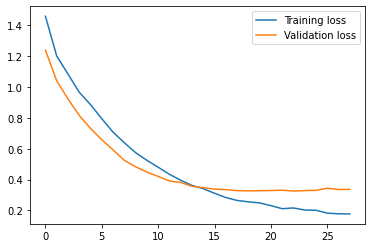

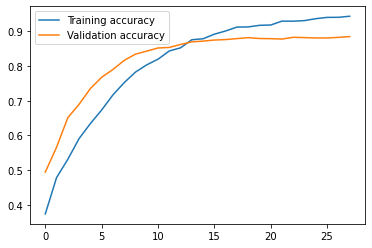

0.8820951128643436

In [ ]:
n1 = 378
n2 = 128
n3 = 25
n4 = 5

#for train_idx, test_idx in kf.split(data):
y_truth = np_utils.to_categorical(labels)[:,1:].astype(int)

X_train, X_test, y_train, y_test = train_test_split(data, y_truth, test_size=0.5, shuffle=True )

MLP = modelNN(n1, n2, n3, n4)
MLP.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.99), 
              metrics=['accuracy'])
hist = MLP.fit(X_train, y_train, 
                  batch_size=10, epochs=50, 
                  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
                  validation_data=(X_test,y_test))
mostrarEvolucion(hist)
y_predict = MLP.predict(X_test)
acc = calcularAccuracy(y_test, y_predict)

acc

## Predicción de test

PREDECIMOS

In [ ]:
X_test = d_test.to_numpy()
X_test_oh = ohe.transform( X_test ).toarray()
X_test = np.hstack( (X_test_oh,np.delete(X_test,categorical_features,axis=1)) )
X_test = scaler_oh.transform(X_test)

In [ ]:
y_predict = MLP.predict(X_test)

In [ ]:
y_predict = list( map(lambda x: np.argmax(x)+1,y_predict) )

In [ ]:
result = pd.DataFrame({'id':test_ids, 'Precio_cat':y_predict})

In [ ]:
result

,id,Precio_cat
0,4820,5
1,4821,3
2,4822,2
3,4823,3
4,4824,3
...,...,...
1154,5974,2
1155,5975,3
1156,5976,4
1157,5977,5


In [ ]:
#result.to_csv('resultados_4.csv', index=False)